In [35]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [53]:
%pip install colabcode


                                              0.0/45.5 kB ? eta -:--:--
     ------------------------------------     41.0/45.5 kB ? eta -:--:--
     -------------------------------------- 45.5/45.5 kB 568.8 kB/s eta 0:00:00
                                              0.0/8.3 MB ? eta -:--:--
                                              0.1/8.3 MB ? eta -:--:--
                                              0.1/8.3 MB ? eta -:--:--
                                              0.1/8.3 MB 1.2 MB/s eta 0:00:07
                                              0.1/8.3 MB 1.2 MB/s eta 0:00:07
     -                                        0.3/8.3 MB 1.2 MB/s eta 0:00:07
     -                                        0.3/8.3 MB 1.2 MB/s eta 0:00:07
     --                                       0.5/8.3 MB 1.6 MB/s eta 0:00:05
     --                                       0.5/8.3 MB 1.6 MB/s eta 0:00:05
     ---                                      0.7/8.3 MB 1.8 MB/s eta 0:00:05
     ----      

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.
black 0.0 requires click>=8.0.0, but you have click 7.1.2 which is incompatible.
conda-index 0.2.3 requires click>=8, but you have click 7.1.2 which is incompatible.
dask 2023.6.0 requires click>=8.0, but you have click 7.1.2 which is incompatible.
distributed 2023.6.0 requires click>=8.0, but you have click 7.1.2 which is incompatible.
flask 2.2.2 requires click>=8.0, but you have click 7.1.2 which is incompatible.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.


## Load the data

In [36]:
import pandas as pd

df = pd.read_csv('data.csv', delimiter=";")
print(df.head())


   code_affilie date_affiliation date_creation       ville  \
0     626244365       18.06.2010                     RABAT   
1     613330445       22.10.2007                CASABLANCA   
2     619867055       27.01.2009                CASABLANCA   
3     534330665       01.01.1994                CASABLANCA   
4     597833450       01.02.2003                CASABLANCA   

  code_group_br_activite  code_branche_activite  code_activte  \
0                      H                     52            21   
1                      M                     71            12   
2                      F                     43            29   
3                      M                     69            20   
4                      G                     46            90   

                                     forme_juridique  code_immatricule  \
0                                  SociÃ©tÃ© Anonyme        6825000788   
1  SociÃ©tÃ© Ã  rÃ©sponsabilitÃ© limitÃ©e Ã  asso...        6825002756   
2             

In [37]:
print(df.dtypes)


code_affilie               int64
date_affiliation          object
date_creation             object
ville                     object
code_group_br_activite    object
code_branche_activite      int64
code_activte               int64
forme_juridique           object
code_immatricule           int64
date_immatriculation      object
sexe                      object
nationalite               object
date_naissance            object
annee_declaration          int64
nb_mois_declare            int64
salaire_annuel            object
nbr_jours_annuel           int64
dtype: object


## Type Casting for non suitable features

In [38]:
# Convert date columns to datetime
date_columns = [
    "date_affiliation",
    "date_creation",
    "date_immatriculation",
    "date_naissance"
]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')


df["salaire_annuel"] = (
    df["salaire_annuel"]
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
    .astype('int64')
    
)


df_cleaned = df.replace(['-', ' ', ':'], pd.NA)
print(df_cleaned.isnull().sum())

print(df_cleaned.dtypes)

code_affilie                0
date_affiliation            0
date_creation             582
ville                       1
code_group_br_activite      0
code_branche_activite       0
code_activte                0
forme_juridique             0
code_immatricule            0
date_immatriculation        0
sexe                        0
nationalite                 0
date_naissance              0
annee_declaration           0
nb_mois_declare             0
salaire_annuel              0
nbr_jours_annuel            0
dtype: int64
code_affilie                       int64
date_affiliation          datetime64[ns]
date_creation             datetime64[ns]
ville                             object
code_group_br_activite            object
code_branche_activite              int64
code_activte                       int64
forme_juridique                   object
code_immatricule                   int64
date_immatriculation      datetime64[ns]
sexe                              object
nationalite               

## Fix Text Encoding for the data

In [39]:
accent_map = {
    r'Ã©': 'é', r'Ãè': 'è', r'Ãê': 'ê', r'Ãë': 'ë',
    r'Ã¢': 'â', r'Ã¤': 'ä', r'Ã': 'à',
    r'Ãù': 'ù', r'Ãû': 'û', r'Ã¼': 'ü',
    r'Ã§': 'ç', r'Ãî': 'î', r'Ãï': 'ï',
    r'Ã´': 'ô', r'Ã¶': 'ö',
    r'Ã‰': 'É', r'Ã€': 'À', r'Ãˆ': 'È', r'ÃÊ': 'Ê', r'ÃË': 'Ë',
    r'ÃŽ': 'Î', r'Ã”': 'Ô', r'Ãœ': 'Ü', r'Ã‡': 'Ç'
}

for accent in accent_map:
    df_cleaned = df_cleaned.replace(accent,accent_map[accent] ,regex=True)

print(df_cleaned.head())

   code_affilie date_affiliation date_creation       ville  \
0     626244365       2010-06-18           NaT       RABAT   
1     613330445       2007-10-22           NaT  CASABLANCA   
2     619867055       2009-01-27           NaT  CASABLANCA   
3     534330665       1994-01-01           NaT  CASABLANCA   
4     597833450       2003-02-01           NaT  CASABLANCA   

  code_group_br_activite  code_branche_activite  code_activte  \
0                      H                     52            21   
1                      M                     71            12   
2                      F                     43            29   
3                      M                     69            20   
4                      G                     46            90   

                                     forme_juridique  code_immatricule  \
0                                    Société Anonyme        6825000788   
1  Société à  résponsabilité limitée à  associé u...        6825002756   
2             

In [40]:
import matplotlib.pyplot as plt

## Boite a moustaches -  Testing for sali=aire_annuel (to be extended to the rest of features)

## Find outliers

In [41]:
print(df_cleaned["salaire_annuel"].count())

1000


In [42]:
features = ["salaire_annuel"]

for feature in features:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.75 * IQR
    upper_bound = Q3 + 2.75* IQR
    outliers = df_cleaned[(df_cleaned[feature] < lower_bound) | (df_cleaned[feature] > upper_bound)]
    print("Outliers count:", len(outliers))
    print(f"Outliers for {feature}:\n", outliers[[feature]])

Outliers count: 51
Outliers for salaire_annuel:
      salaire_annuel
1            425605
17           606379
38           294017
68          1383284
79           176788
82           140518
106          442968
146          188898
147          182744
207          216834
211          175385
230          274105
253          175224
254          144801
255          234373
267          145164
268          174568
315          134907
338          178382
396          243599
398          241462
420          162945
447          563735
448          183200
472          236619
473          150397
491          179784
492          196987
493          309163
496          300255
502          138400
515          148338
519          327949
537          214790
551          217017
557          191161
564          145152
603          247675
646          137574
656          139630
661          371740
713          403710
715          328038
723          149876
757          244024
771          465788
796        

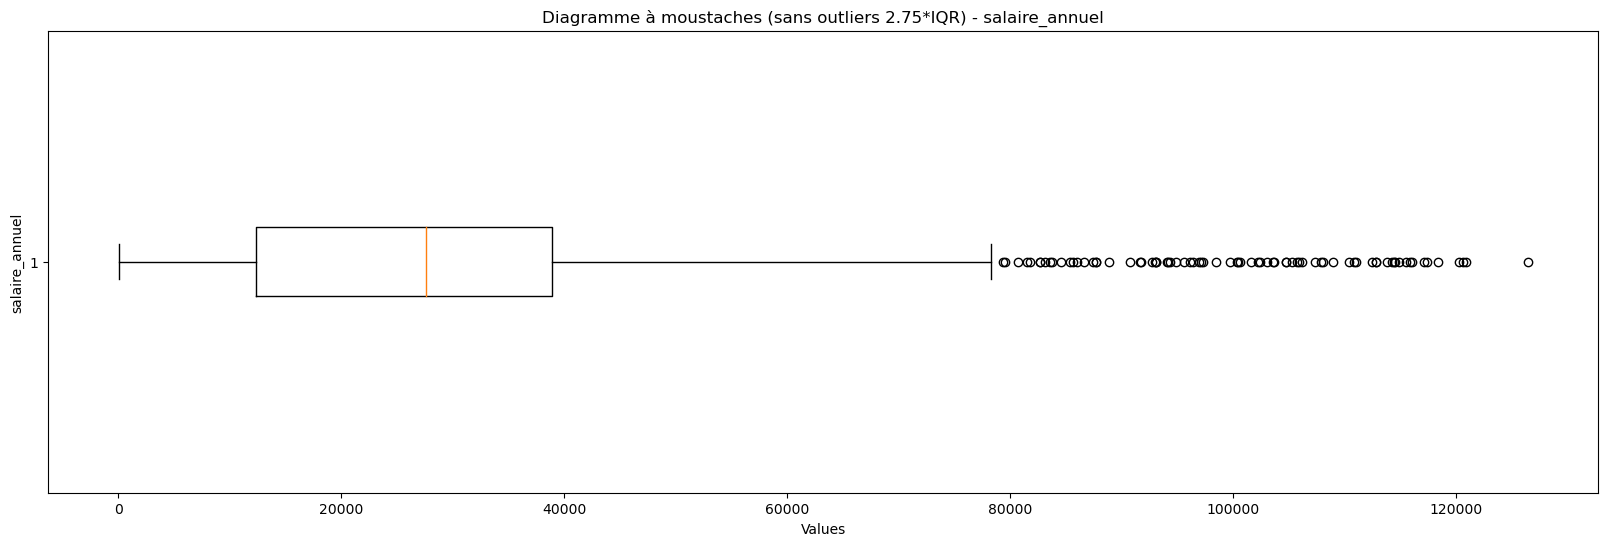

In [43]:
# Make box plots for all numerical features only, using the custom outlier bounds (2.75*IQR)
numerical_features = ["salaire_annuel"]

for feature in numerical_features:
    plt.figure(figsize=(20, 6))
    plt.boxplot(data_no_outliers, vert=False)
    plt.title(f"Diagramme à moustaches (sans outliers 2.75*IQR) - {feature}")
    plt.xlabel("Values")
    plt.ylabel(feature)
    plt.show()

# Find and print the rows with minimum and maximum salaries

In [44]:
min_salary = df_cleaned["salaire_annuel"].min()
max_salary = df_cleaned["salaire_annuel"].max()

print("Row with minimum salaire_annuel:")
print(df_cleaned[df_cleaned["salaire_annuel"] == min_salary])

print("\nRow with maximum salaire_annuel:")
print(df_cleaned[df_cleaned["salaire_annuel"] == max_salary])

Row with minimum salaire_annuel:
     code_affilie date_affiliation date_creation           ville  \
346     549770930       2000-09-30    1997-01-01  FKIH BEN SALAH   

    code_group_br_activite  code_branche_activite  code_activte  \
346                      A                      1            13   

     forme_juridique  code_immatricule date_immatriculation sexe nationalite  \
346  Société Anonyme        6825206246           2013-02-06    F   MAROCAINE   

    date_naissance  annee_declaration  nb_mois_declare  salaire_annuel  \
346     1973-06-30               2016                1              60   

     nbr_jours_annuel  
346                 1  

Row with maximum salaire_annuel:
    code_affilie date_affiliation date_creation       ville  \
68     540502415       1997-07-01           NaT  CASABLANCA   

   code_group_br_activite  code_branche_activite  code_activte  \
68                      G                     46            46   

    forme_juridique  code_immatricule date_

## Histogramme de la distribtuon des salaires

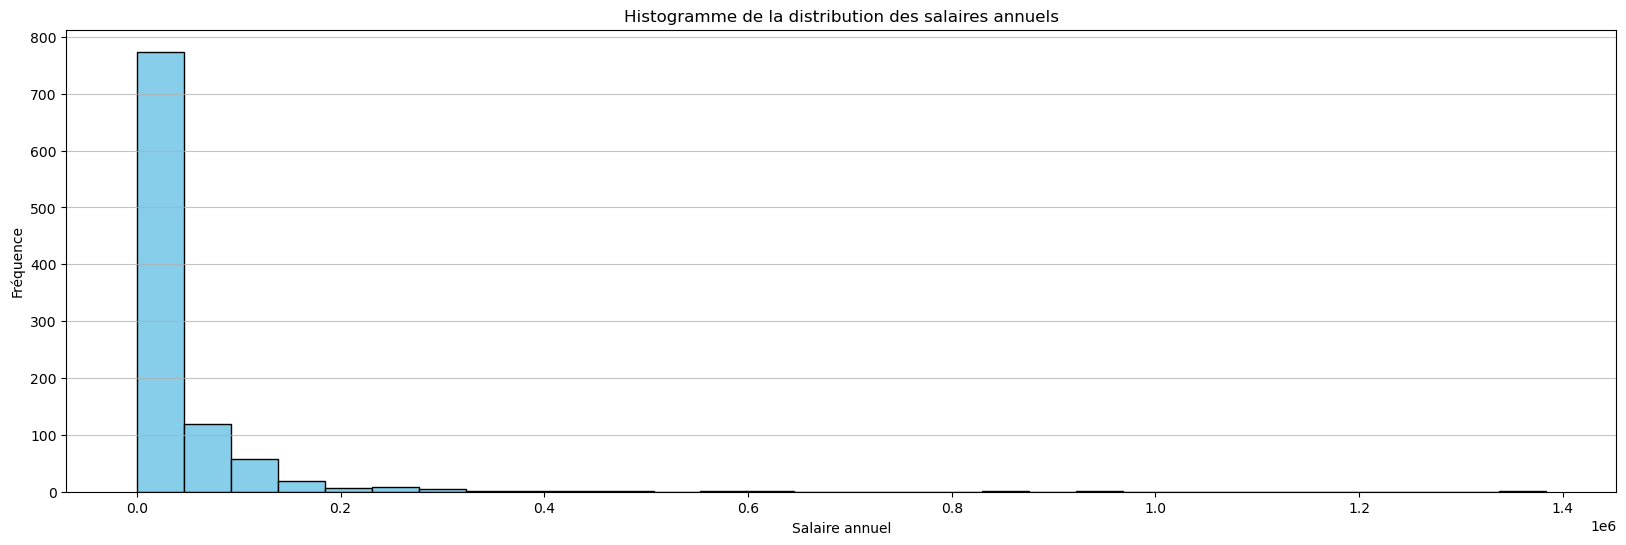

In [46]:
plt.figure(figsize=(20, 6))
plt.hist(df_cleaned["salaire_annuel"], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogramme de la distribution des salaires annuels")
plt.xlabel("Salaire annuel")
plt.ylabel("Fréquence")
plt.grid(axis='y', alpha=0.75)
plt.show()


count    1000.000000
mean       46.145000
std        12.107128
min        27.000000
25%        38.000000
50%        43.000000
75%        52.000000
max       115.000000
Name: age, dtype: float64

Âge minimum: 27
Âge maximum: 115
Âge moyen: 46.15


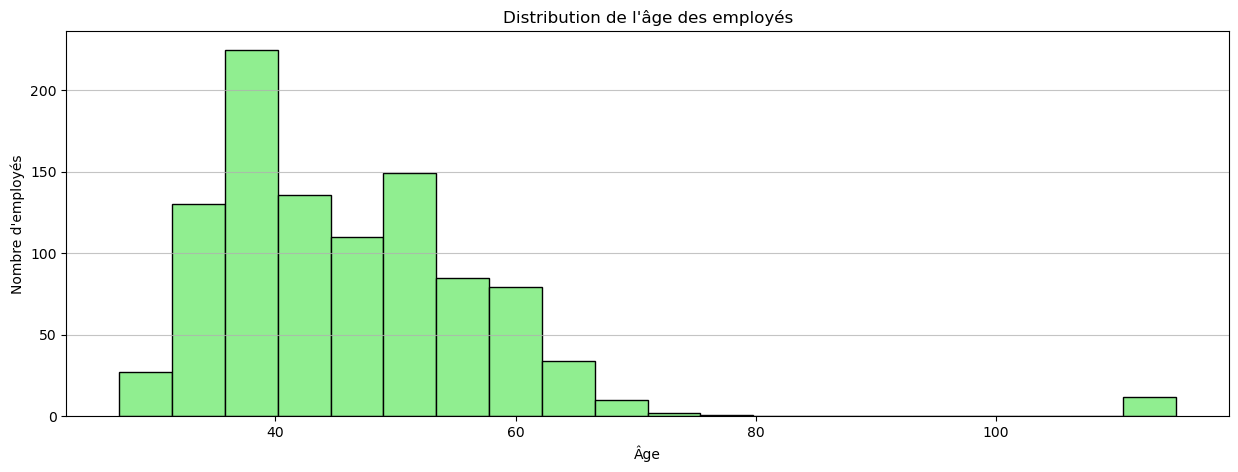

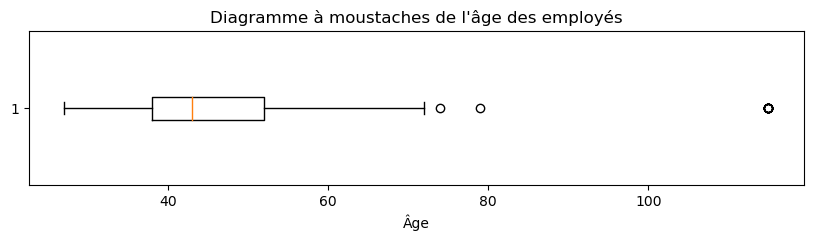

In [54]:
# Calcul de l'âge

import datetime
aujourd_hui = pd.Timestamp(datetime.date.today())
df_cleaned['age'] = (aujourd_hui - df_cleaned['date_naissance']).dt.days // 365


age_stats = df_cleaned['age'].describe()

print(age_stats)
# Age minimum et maximum
min_age = df_cleaned['age'].min()
max_age = df_cleaned['age'].max()
print(f"\nÂge minimum: {min_age}")
print(f"Âge maximum: {max_age}")
age_moyen = df_cleaned['age'].mean()
print(f"Âge moyen: {age_moyen:.2f}")


# Visualiser la distribution de l'âge
plt.figure(figsize=(15, 5))
plt.hist(df_cleaned['age'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution de l'âge des employés")
plt.xlabel("Âge")
plt.ylabel("Nombre d'employés")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Visualiser la répartition grâce à un boxplot
plt.figure(figsize=(10, 2))
plt.boxplot(df_cleaned['age'], vert=False)
plt.title("Diagramme à moustaches de l'âge des employés")
plt.xlabel("Âge")
plt.show()



## Salary to age analysis

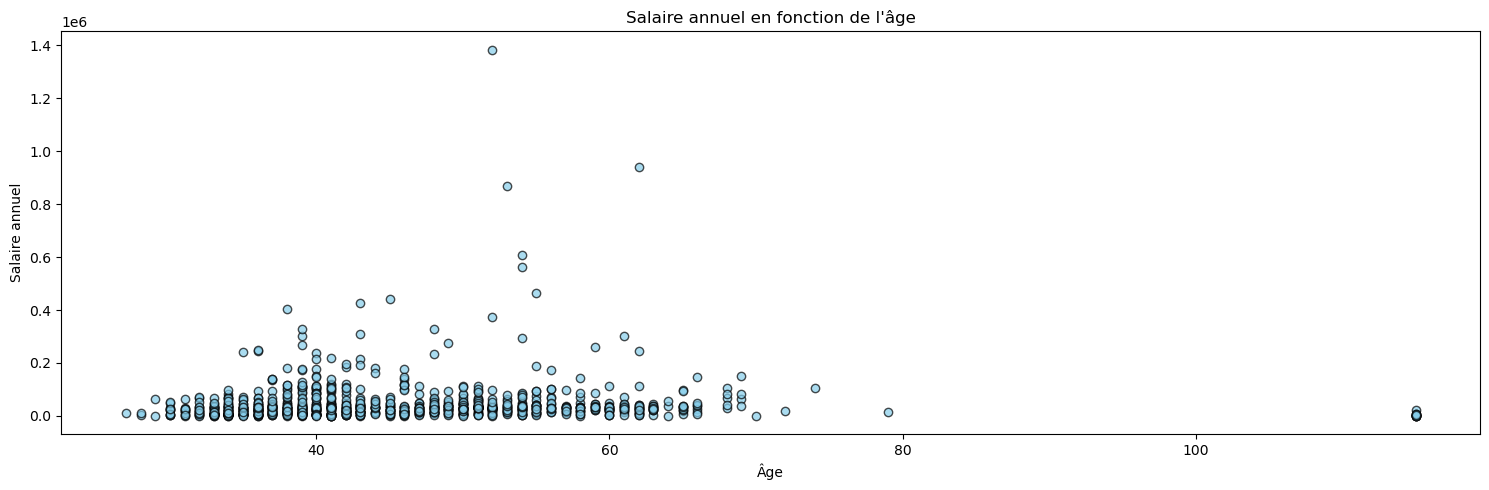

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(df_cleaned['age'], df_cleaned['salaire_annuel'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Salaire annuel')
plt.title('Salaire annuel en fonction de l\'âge')
plt.tight_layout()
plt.show()


### Create classes of age to visualize data better

In [67]:
# Définir les classes d'âge
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_cleaned['classe_age'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=False)

# Afficher le nombre d'employés par classe d'âge
age_class_counts = df_cleaned['classe_age'].value_counts(sort=False)
print("Répartition des employés par classe d'âge :")
print(age_class_counts)

Répartition des employés par classe d'âge :
18-24      0
25-34    123
35-44    395
45-54    290
55-64    149
65+       31
Name: classe_age, dtype: int64


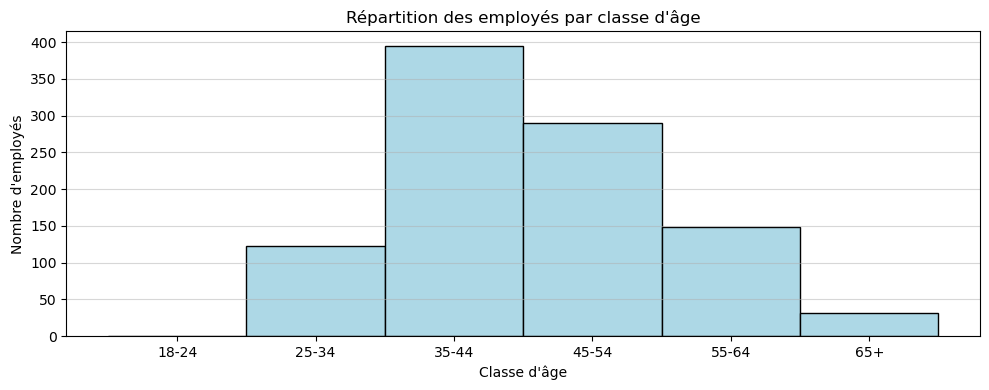

In [69]:

# Définir les positions et étiquettes de ticks pour les classes d'âge
tick_positions = range(len(labels))
tick_labels = labels

# Afficher un barplot des classes d'âge
plt.figure(figsize=(10,4))
plt.bar(tick_positions, age_class_counts.values, color='lightblue', edgecolor='black', width=1)
plt.title("Répartition des employés par classe d'âge")
plt.xlabel("Classe d'âge")
plt.ylabel("Nombre d'employés")
plt.xticks(tick_positions, tick_labels)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()



Distribution des salaires par classe d'âge :
classe_salaire  <20k  20-39k  40-59k  60-79k  80-99k  100k+
classe_age                                                 
25-34             69      34       9       9       2      0
35-44            146     119      41      22      14     53
45-54             86     125      30      16      11     22
55-64             34      79      13       6       5     12
65+                7      12       2       2       4      4


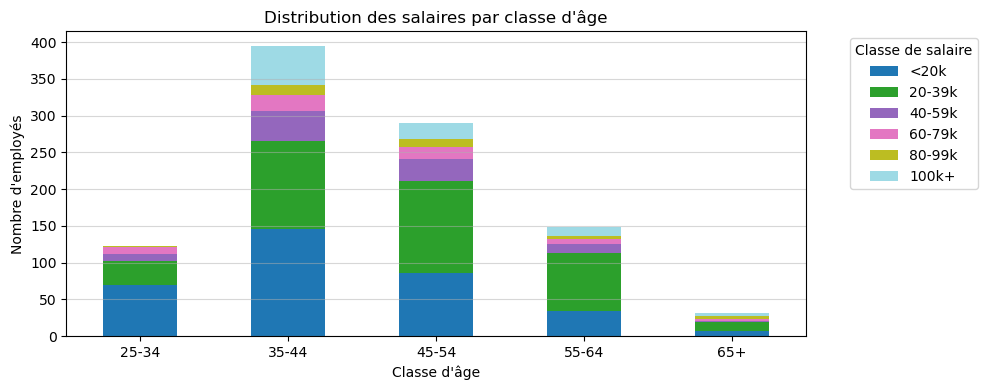

In [71]:
# Afficher un barplot des classes d'âge en focntion des salaires
# Définir les classes de salaires
salary_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
salary_labels = ['<20k', '20-39k', '40-59k', '60-79k', '80-99k', '100k+']
df_cleaned['classe_salaire'] = pd.cut(df_cleaned['salaire_annuel'], bins=salary_bins, labels=salary_labels, right=False)

# Calculer la distribution croisée des tranches d'âge et de salaire
distribution_ages_salaires = pd.crosstab(df_cleaned['classe_age'], df_cleaned['classe_salaire'])

# Afficher la distribution
print("Distribution des salaires par classe d'âge :")
print(distribution_ages_salaires)
# Afficher la distribution des salaires par classe d'âge sous forme de barplot empilé
distribution_ages_salaires.plot(kind="bar",stacked=True,figsize=(10, 4),colormap="tab20")
plt.title("Distribution des salaires par classe d'âge")
plt.xlabel("Classe d'âge")
plt.ylabel("Nombre d'employés")
plt.xticks(rotation=0)
plt.legend(title="Classe de salaire", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()